In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Loading Data
There are 12 files belonging to 3 scenarios for four algorithms.

In [2]:
file_path = "Objective_Functions/objective_"


# Diagonalization algorithm
df_diag_mixed = pd.read_csv(file_path + "Mixed_Diag.csv")
df_diag_PVs = pd.read_csv(file_path + "Fixed_PVs_Diag.csv")
df_diag_EVs = pd.read_csv(file_path + "Fixed_EVs_Diag.csv")

# AHE algorithm
df_ahe_mixed = pd.read_csv(file_path + "Mixed_AHE.csv")
df_ahe_PVs = pd.read_csv(file_path + "Fixed_PVs_AHE.csv")
df_ahe_EVs = pd.read_csv(file_path + "Fixed_EVs_AHE.csv")

#FP Algorithm
df_fp_mixed = pd.read_csv(file_path + "Mixed_FP.csv")
df_fp_PVs = pd.read_csv(file_path + "Fixed_PVs_FP.csv")
df_fp_EVs = pd.read_csv(file_path + "Fixed_EVs_FP.csv")

#SFP Algorithms
df_sfp_mixed = pd.read_csv(file_path + "Mixed_SFP.csv")
df_sfp_PVs = pd.read_csv(file_path + "Fixed_PVs_SFP.csv")
df_sfp_EVs = pd.read_csv(file_path + "Fixed_EVs_SFP.csv")


In [3]:
# add all dataframes 
df_all = [df_diag_mixed, df_diag_PVs, df_diag_EVs, 
          df_ahe_mixed,  df_ahe_PVs,  df_ahe_EVs, 
          df_fp_mixed,   df_fp_PVs,   df_fp_EVs, 
          df_sfp_mixed,  df_sfp_PVs,  df_sfp_EVs ]

algo_list = ["Diag", "AHE", "FP", "SFP"]

scen_list = ["Mixed", "Fixed_EVS", "Fixed_PVs"]

#****************************************************
cat_dict = dict()
for i in range(1,10):
    if i%2==0:
        cat_dict['DA'+str(i)] = "CAT_01"
    elif i%3==0:
        cat_dict['DA'+str(i)] = "CAT_02"
    else:
        cat_dict['DA'+str(i)] = "CAT_03"

#****************************************************
col_dict= dict()
for i in range(1,10):
    col_dict[str(i)] = "DA"+str(i)

#****************************************************
for df in df_all:
    df.rename(columns = col_dict, inplace=True)

# 2) Compare Dataframe values

### 2.1) Compare based on scenario and algorithm last N Iterations

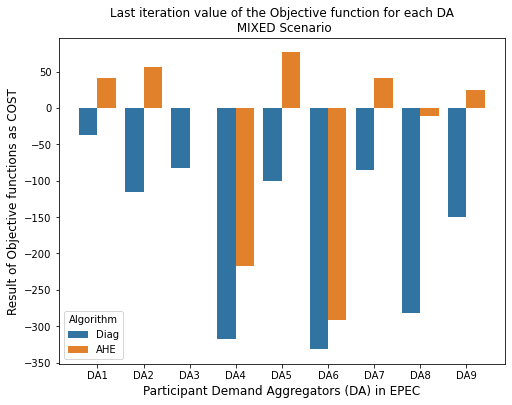

In [6]:
# Compare each last row of data frames with each other as bar plot
cost=[]
da=[]
algo=[]


for idx , val in zip(df_diag_mixed.iloc[-1].index, df_diag_mixed.iloc[-1]):
    cost.append(val)
    da.append(idx)
    algo.append('Diag')

for idx , val in zip(df_ahe_mixed.iloc[-1].index, df_ahe_mixed.iloc[-1]):
    cost.append(val)
    da.append(idx)
    algo.append('AHE')

df_temp = pd.DataFrame({'Cost':cost, 'Algorithm':algo, 'DA':da})
df_temp.Cost = pd.to_numeric(df_temp.Cost,  errors='coerce')

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

sns.barplot(data= df_temp, x='DA',y='Cost' ,hue='Algorithm', ax=ax);

ax.set_title('Last iteration value of the Objective function for each DA\n MIXED Scenario', fontsize=12)
ax.set_xlabel('Participant Demand Aggregators (DA) in EPEC',fontsize=12);
ax.set_ylabel('Result of Objective functions as COST',fontsize=12);

ax.plot()

ax.set_rasterized(True)
#fig.savefig("Figures/obj_figures/Mixed_Last_Iterations_BarPlot_Diag_AHE.eps", bbox_inches= 'tight')

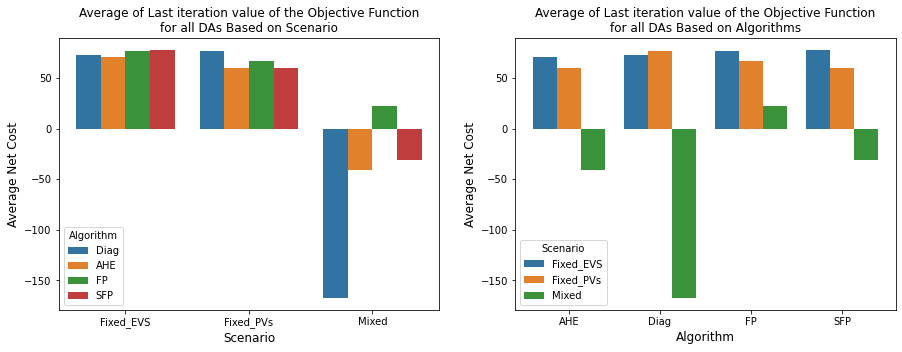

In [5]:
# Compare each last row of data frames with each other as bar plot
cost=[]
da=[]
algo=[]
scen=[]

counter = 0
counter_scen = 0
for df in df_all:
    for idx , val in zip(df.iloc[-1].index, df.iloc[-1]):
        cost.append(val)
        da.append(idx)
        algo.append(algo_list[counter % 4])
        scen.append(scen_list[counter_scen])
    counter+=1
    if counter %4 == 0:
        counter_scen += 1 
    

df_temp = pd.DataFrame({'Cost':cost, 'Algorithm':algo, 'DA':da, 'Scenario':scen})
df_temp.Cost = pd.to_numeric(df_temp.Cost,  errors='coerce')

# fig = plt.figure(figsize=(8,6))
# ax = fig.add_subplot(1,1,1)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

order =['Diag', 'AHE', 'FP', 'SFP']
sns.barplot(#data= df_temp.groupby(['Algorithm','DA']).mean().reset_index(), 
            data=df_temp.groupby(['Algorithm','Scenario']).mean().reset_index(),
            x='Scenario',y='Cost' ,hue='Algorithm', hue_order=order,
            ax=axes[0]);

axes[0].set_title('Average of Last iteration value of the Objective Function\nfor all DAs Based on Scenario', fontsize=12)
axes[0].set_xlabel('Scenario',fontsize=12);
axes[0].set_ylabel('Average Net Cost',fontsize=12);
axes[0].plot()
axes[0].set_rasterized(True)

sns.barplot(#data= df_temp.groupby(['Algorithm','DA']).mean().reset_index(), 
            data=df_temp.groupby(['Algorithm','Scenario']).mean().reset_index(),
            x='Algorithm',y='Cost' ,hue='Scenario', 
            ax=axes[1]);

axes[1].set_title('Average of Last iteration value of the Objective Function\nfor all DAs Based on Algorithms', fontsize=12)
axes[1].set_xlabel('Algorithm',fontsize=12);
axes[1].set_ylabel('Average Net Cost',fontsize=12);
axes[1].plot()
axes[1].set_rasterized(True)

fig.savefig("Obj_figures/Average_Last_Iter_Based_On_Scen_Algo.png", bbox_inches= 'tight')

# Average of last N Iterations

C:\Users\alire\AppData\Local\Temp/ipykernel_2172/2061873527.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_temp = df_temp.mean()


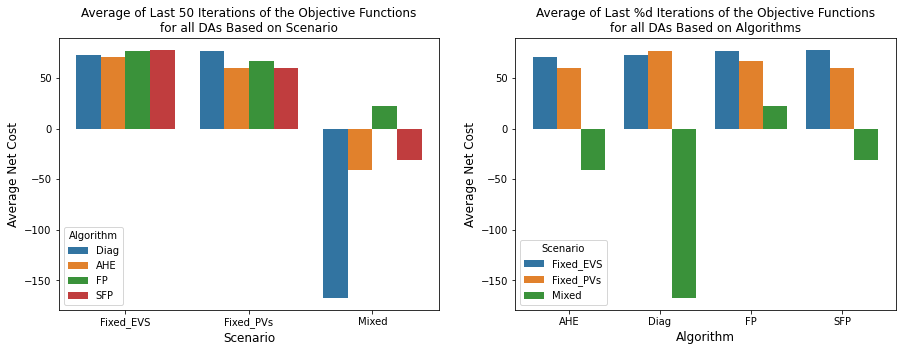

In [17]:
# Compare each last row of data frames with each other as bar plot
cost=[]
da=[]
algo=[]
scen=[]

counter = 0
counter_scen = 0

last_n_iter = 50

for df in df_all:
    df_temp = df[-last_n_iter:]
    df_temp = df_temp.mean()
    for idx , val in zip(df.iloc[-1].index, df.iloc[-1]):
        cost.append(val)
        da.append(idx)
        algo.append(algo_list[counter % 4])
        scen.append(scen_list[counter_scen])
    counter+=1
    if counter %4 == 0:
        counter_scen += 1 
    

df_temp = pd.DataFrame({'Cost':cost, 'Algorithm':algo, 'DA':da, 'Scenario':scen})
df_temp.Cost = pd.to_numeric(df_temp.Cost,  errors='coerce')

# fig = plt.figure(figsize=(8,6))
# ax = fig.add_subplot(1,1,1)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

order =['Diag', 'AHE', 'FP', 'SFP']
sns.barplot(#data= df_temp.groupby(['Algorithm','DA']).mean().reset_index(), 
            data=df_temp.groupby(['Algorithm','Scenario']).mean().reset_index(),
            x='Scenario',y='Cost' ,hue='Algorithm', hue_order=order,
            ax=axes[0]);

axes[0].set_title('Average of Last %d Iterations of the Objective Functions\nfor all DAs Based on Scenario'%last_n_iter, fontsize=12)
axes[0].set_xlabel('Scenario',fontsize=12);
axes[0].set_ylabel('Average Net Cost',fontsize=12);
axes[0].plot()
axes[0].set_rasterized(True)

sns.barplot(#data= df_temp.groupby(['Algorithm','DA']).mean().reset_index(), 
            data=df_temp.groupby(['Algorithm','Scenario']).mean().reset_index(),
            x='Algorithm',y='Cost' ,hue='Scenario', 
            ax=axes[1]);

axes[1].set_title('Average of Last %d Iterations of the Objective Functions\nfor all DAs Based on Algorithms', fontsize=12)
axes[1].set_xlabel('Algorithm',fontsize=12);
axes[1].set_ylabel('Average Net Cost',fontsize=12);
axes[1].plot()
axes[1].set_rasterized(True)

fig.savefig("Obj_figures/Average_Last_N_Iter_Based_On_Scen_Algo.png", bbox_inches= 'tight')

# Average of last N Iterations: Categorical


C:\Users\alire\AppData\Local\Temp/ipykernel_3508/1752053423.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_temp = df_temp.mean()


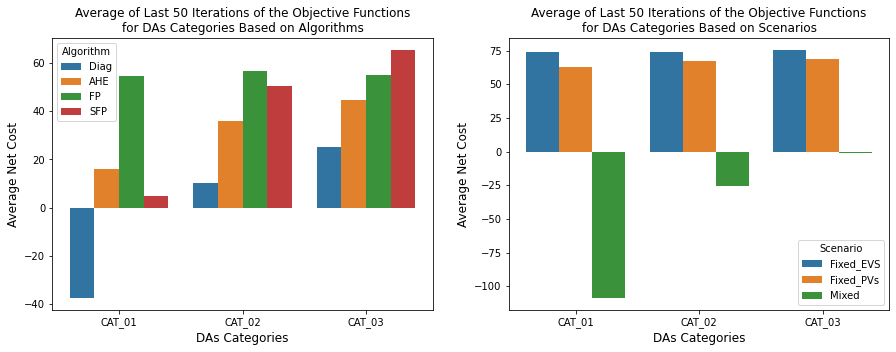

In [6]:
# Compare each last row of data frames with each other as bar plot
cost=[]
da=[]
algo=[]
scen=[]

counter = 0
counter_scen = 0

last_n_iter = 50

for df in df_all:
    df_temp = df[-last_n_iter:]
    df_temp = df_temp.mean()
    for idx , val in zip(df.iloc[-1].index, df.iloc[-1]):
        cost.append(val)
        da.append(idx)
        algo.append(algo_list[counter % 4])
        scen.append(scen_list[counter_scen])
    counter+=1
    if counter %4 == 0:
        counter_scen += 1 
    

df_temp = pd.DataFrame({'Cost':cost, 'Algorithm':algo, 'DA':da, 'Scenario':scen})
df_temp.Cost = pd.to_numeric(df_temp.Cost,  errors='coerce')

#*********************************************
#******* Dictionary for Categories ***********
for key, value in cat_dict.items():
    df_temp.loc[df_temp.DA==key,'DA'] = value

# fig = plt.figure(figsize=(8,6))
# ax = fig.add_subplot(1,1,1)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

order =['Diag', 'AHE', 'FP', 'SFP']
sns.barplot(#data= df_temp.groupby(['Algorithm','DA']).mean().reset_index(), 
            data=df_temp.groupby(['Algorithm','DA']).mean().reset_index(),
            x='DA',y='Cost' ,hue='Algorithm', hue_order=order,
            ax=axes[0]);

axes[0].set_title('Average of Last %d Iterations of the Objective Functions\nfor DAs Categories Based on Algorithms'%last_n_iter, fontsize=12)
axes[0].set_xlabel('DAs Categories',fontsize=12);
axes[0].set_ylabel('Average Net Cost',fontsize=12);
axes[0].plot()
axes[0].set_rasterized(True)

sns.barplot(#data= df_temp.groupby(['Algorithm','DA']).mean().reset_index(), 
            data=df_temp.groupby(['DA','Scenario']).mean().reset_index(),
            x='DA',y='Cost' ,hue='Scenario', 
            ax=axes[1]);

axes[1].set_title('Average of Last %d Iterations of the Objective Functions\nfor DAs Categories Based on Scenarios'%last_n_iter, fontsize=12)
axes[1].set_xlabel('DAs Categories',fontsize=12);
axes[1].set_ylabel('Average Net Cost',fontsize=12);
axes[1].plot()
axes[1].set_rasterized(True)

#fig.savefig("Obj_figures/Average_Last_N_Iter_Based_On_Scen_Algo.png", bbox_inches= 'tight')

In [14]:
df_temp

,Cost,Algorithm,DA,Scenario
0,-37.820437,Diag,CAT_03,Mixed
1,-115.167268,Diag,CAT_01,Mixed
2,-82.796607,Diag,CAT_02,Mixed
3,-317.715363,Diag,CAT_01,Mixed
4,-101.087404,Diag,CAT_03,Mixed
...,...,...,...,...
103,61.553097,SFP,CAT_02,Fixed_PVs
104,52.395863,SFP,CAT_01,Fixed_PVs
105,54.395340,SFP,CAT_01,Fixed_PVs
106,53.499797,SFP,CAT_01,Fixed_PVs


# Compare Last and First N Iterations

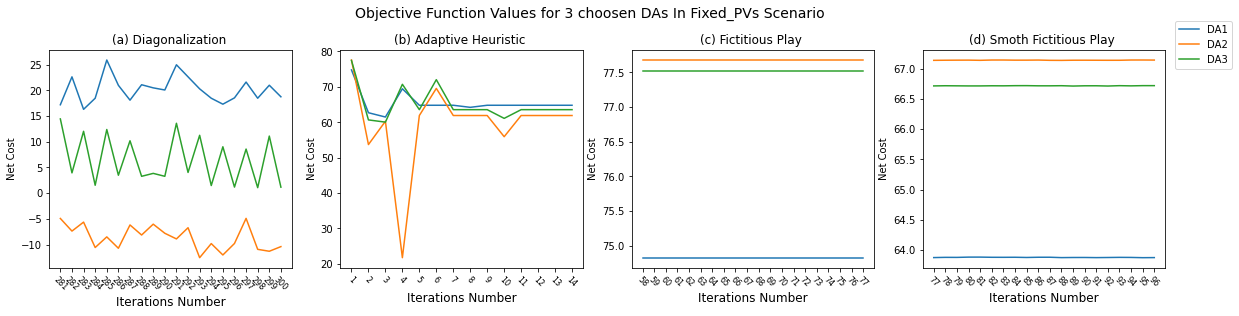

In [110]:
selected_DAs = ['DA1', 'DA2', 'DA3']
selected_dfs = [1,4,7,10]
last_n_iter = 20

fig, axes = plt.subplots(1, 4, figsize=(20, 4))
parts=['a', 'b', 'c', 'd']
algos=['Diagonalization', 'Adaptive Heuristic', 'Fictitious Play', 'Smoth Fictitious Play']

counter = 0

for df in selected_dfs:
    df_temp = df_all[df][-last_n_iter:][selected_DAs]
    
    if last_n_iter < len(df_all[df]):
        x_range = [x for x in range(len(df_all[df])-last_n_iter,len(df_all[df]))]
        x_ticks = [x for x in range(len(df_all[df])-last_n_iter,len(df_all[df]))]
    else:
        x_range = [x for x in range(1,len(df_all[df])+1)]
        x_ticks = [x for x in range(1,len(df_all[df])+1)]
        
    # Group them and create columns as they are three Selected DAs    
    X_range =[*x_range, *x_range, *x_range]
    
    # Change the shape of the selected dataframe
    df_temp = df_temp.melt(var_name='DAs', value_name='Net Cost')
    
    # Add new columns to reshaped dataframe
    df_temp['Iteration'] = X_range
    
    sns.lineplot(data=df_temp, x='Iteration', y='Net Cost', hue='DAs', ax=axes[counter] )
    #axes[counter].set_xlabel('Last %d iterations'%last_n_iter, fontsize=12)
    axes[counter].set_xlabel('Iterations Number', fontsize=12)
    axes[counter].title.set_text('({part}) {algo} '.format(part=parts[counter], algo=algos[counter]))
    axes[counter].set_rasterized(True)
    axes[counter].set_xticks(x_ticks)
    axes[counter].tick_params(axis="x", labelsize=8, rotation=-45)
    counter+=1


handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper right')
fig.legend(handles, labels, bbox_to_anchor=(0.95, 1))

for ax in axes:
    ax.get_legend().remove()
    
fig.suptitle("Objective Function Values for 3 choosen DAs In Fixed_PVs Scenario", fontsize=14, y=1.03);
#plt.xticks(rotation=45, fontsize=8)


fig.savefig("Obj_figures/Fix_PVs_Last_Iterations_line_plot.png", bbox_inches= 'tight')

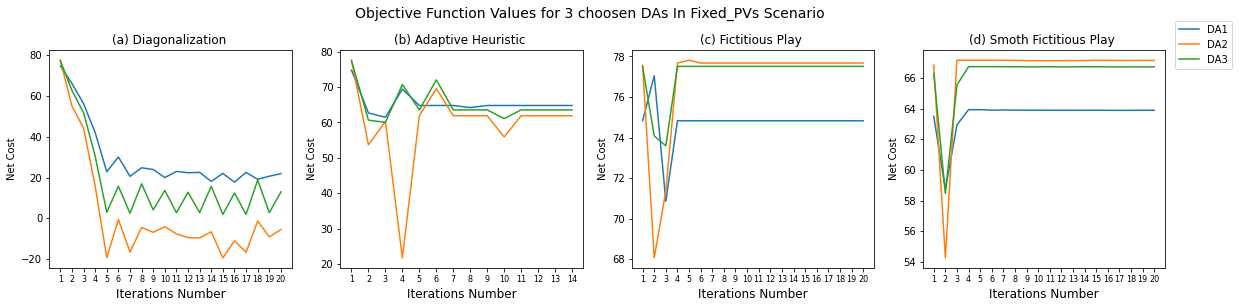

In [113]:
selected_DAs = ['DA1', 'DA2', 'DA3']
selected_dfs = [1,4,7,10]
first_n_iter = 20

fig, axes = plt.subplots(1, 4, figsize=(20, 4))
parts=['a', 'b', 'c', 'd']
algos=['Diagonalization', 'Adaptive Heuristic', 'Fictitious Play', 'Smoth Fictitious Play']

counter = 0

for df in selected_dfs:
    df_temp = df_all[df][:first_n_iter][selected_DAs]
    
    if last_n_iter < len(df_all[df]):
        x_range = [x for x in range(1, first_n_iter+1)]
        x_ticks = [x for x in range(1, first_n_iter+1)]
    else:
        x_range = [x for x in range(1,len(df_all[df])+1)]
        x_ticks = [x for x in range(1,len(df_all[df])+1)]
        
    # Group them and create columns as they are three Selected DAs    
    X_range =[*x_range, *x_range, *x_range]
    
    # Change the shape of the selected dataframe
    df_temp = df_temp.melt(var_name='DAs', value_name='Net Cost')
    
    # Add new columns to reshaped dataframe
    df_temp['Iteration'] = X_range
    
    sns.lineplot(data=df_temp, x='Iteration', y='Net Cost', hue='DAs', ax=axes[counter] )
    #axes[counter].set_xlabel('Last %d iterations'%last_n_iter, fontsize=12)
    axes[counter].set_xlabel('Iterations Number', fontsize=12)
    axes[counter].title.set_text('({part}) {algo} '.format(part=parts[counter], algo=algos[counter]))
    axes[counter].set_rasterized(True)
    axes[counter].set_xticks(x_ticks)
    axes[counter].tick_params(axis="x", labelsize=8) #rotation=-45
    counter+=1


handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper right')
fig.legend(handles, labels, bbox_to_anchor=(0.95, 1))

for ax in axes:
    ax.get_legend().remove()
    
fig.suptitle("Objective Function Values for 3 choosen DAs In Fixed_PVs Scenario", fontsize=14, y=1.03);
#plt.xticks(rotation=45, fontsize=8)


fig.savefig("Obj_figures/Fix_PVs_First_Iterations_line_plot.png", bbox_inches= 'tight')

# Compare Categories based on scenario and algorithms

In [143]:
# add all dataframes 
df_all = [df_diag_mixed, df_diag_PVs, df_diag_EVs, 
          df_ahe_mixed,  df_ahe_PVs,  df_ahe_EVs, 
          df_fp_mixed,   df_fp_PVs,   df_fp_EVs, 
          df_sfp_mixed,  df_sfp_PVs,  df_sfp_EVs ]

algo_list = ["Diag", "AHE", "FP", "SFP"]

scen_list = ["Mixed", "Fixed_EVS", "Fixed_PVs"]

